In [4]:
import os
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import cv2

In [5]:
def extract_hog_features(image):
    # Calculate HOG features
    hog_features = hog(image, orientations=9, pixels_per_cell=(8, 8),
    cells_per_block=(2, 2), visualize=False)
    return hog_features

def load_and_extract_features(directory):
    X = []
    y = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):
            image_path = os.path.join(label_dir, filename)
            # Load image using OpenCV
            img = cv2.imread(image_path)
            # Resize image to (128, 128)
            img_resized = cv2.resize(img, (128, 128))
            # Convert image to grayscale
            img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
            # Calculate HOG features
            hog_features = extract_hog_features(img_gray)
            X.append(hog_features)
            y.append(label)
    return X, y

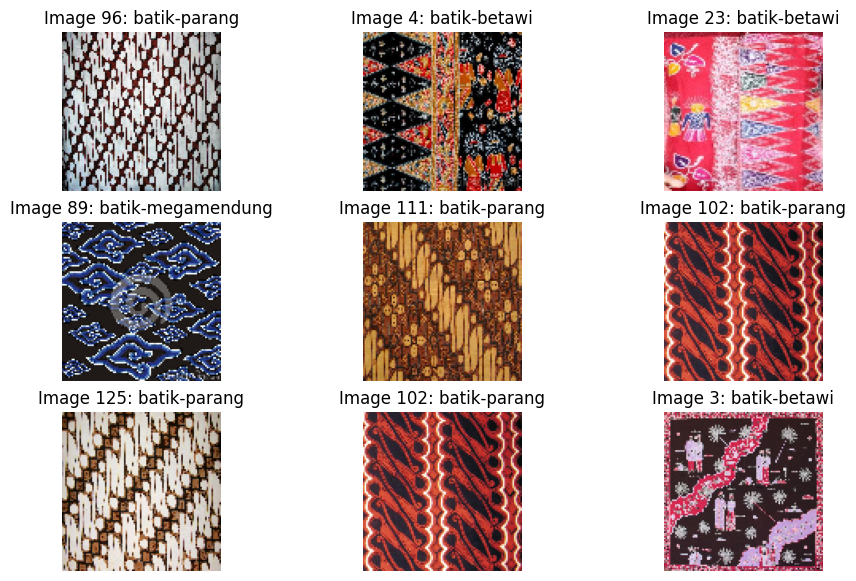

In [ ]:
# Load Sample image for each classes
from matplotlib import pyplot as plt
import random

plt.figure(figsize=(11, 7))
for i in range(9):
    plt.subplot(3, 3, i+1)
    randomNum = random.randrange(0, len(images))
    plt.imshow(images[randomNum] ,cmap='gray')
    plt.axis('off')
    plt.title(f"Image {randomNum}: {class_names[classes[randomNum]]}")

plt.show()